In [73]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pizza-sales-dataset/pizza_sales.csv


In [74]:
pizza_df = pd.read_csv('/kaggle/input/pizza-sales-dataset/pizza_sales.csv')

In [75]:
pizza_df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [76]:
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


There are columns that need to be converted to the appropriate format.

In [77]:
order_date = pizza_df.order_date.apply(lambda a: a.replace('-','/'))
order_date2 = []
for i in order_date:
    splt = i.split('/')  
    if int(splt[0])>12:
        temp=splt[0]
        splt[0]=splt[1]
        splt[1]=temp
        order_date2.append('/'.join(splt))

In [78]:
order_date2_series = pd.Series(order_date2)

In [79]:
order_date2_series

0        01/13/2015
1        01/13/2015
2        01/13/2015
3        01/13/2015
4        01/13/2015
            ...    
29028    12/31/2015
29029    12/31/2015
29030    12/31/2015
29031    12/31/2015
29032    12/31/2015
Length: 29033, dtype: object

In [80]:
pizza_df.order_date = pd.to_datetime(order_date2_series)

In [81]:
pizza_df.order_time = pd.to_timedelta(pizza_df.order_time)

In [82]:
pizza_df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,2015-01-13,0 days 11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,2015-01-13,0 days 11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,2015-01-13,0 days 11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,2015-01-13,0 days 11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,2015-01-13,0 days 11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [83]:
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   pizza_id           48620 non-null  float64        
 1   order_id           48620 non-null  float64        
 2   pizza_name_id      48620 non-null  object         
 3   quantity           48620 non-null  float64        
 4   order_date         29033 non-null  datetime64[ns] 
 5   order_time         48620 non-null  timedelta64[ns]
 6   unit_price         48620 non-null  float64        
 7   total_price        48620 non-null  float64        
 8   pizza_size         48620 non-null  object         
 9   pizza_category     48620 non-null  object         
 10  pizza_ingredients  48620 non-null  object         
 11  pizza_name         48620 non-null  object         
dtypes: datetime64[ns](1), float64(5), object(5), timedelta64[ns](1)
memory usage: 4.5+ MB


Converting Pizza Size to Category

In [84]:
pizza_df.pizza_size.value_counts()

pizza_size
L      18526
M      15385
S      14137
XL       544
XXL       28
Name: count, dtype: int64

In [85]:
sizes = list(pizza_df.pizza_size.value_counts().index)
sizes[0]='S'
sizes[2]='L'

In [86]:
pizza_df.pizza_size = pd.Categorical(pizza_df.pizza_size,sizes,ordered=True)

In [87]:
pizza_df.pizza_size

0        M
1        M
2        L
3        L
4        M
        ..
48615    M
48616    L
48617    S
48618    L
48619    S
Name: pizza_size, Length: 48620, dtype: category
Categories (5, object): ['S' < 'M' < 'L' < 'XL' < 'XXL']

In [88]:
pizza_df.isnull().sum()

pizza_id                 0
order_id                 0
pizza_name_id            0
quantity                 0
order_date           19587
order_time               0
unit_price               0
total_price              0
pizza_size               0
pizza_category           0
pizza_ingredients        0
pizza_name               0
dtype: int64

In [89]:
pizza_df_nona = pizza_df.dropna(subset='order_date')

In [90]:
pizza_df_nona.isnull().sum()

pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [91]:
pizza_df_nona['order_year'] = pizza_df.order_date.dt.year
pizza_df_nona['order_month'] = pizza_df.order_date.dt.month_name().str.slice(stop=3)

/tmp/ipykernel_42/1054670668.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pizza_df_nona['order_year'] = pizza_df.order_date.dt.year
/tmp/ipykernel_42/1054670668.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pizza_df_nona['order_month'] = pizza_df.order_date.dt.month_name().str.slice(stop=3)


In [92]:
pizza_df_nona.groupby('order_month')['total_price'].mean()

order_month
Apr    16.827563
Aug    16.908156
Dec    16.846971
Feb    16.675717
Jan    16.895471
Jul    16.793489
Jun    16.932687
Mar    16.767715
May    16.749341
Nov    16.860793
Oct    16.939259
Sep    16.945951
Name: total_price, dtype: float64

There is much of a difference between average sales each month.

Text(0.5, 1.0, 'Total pizza sold per month')

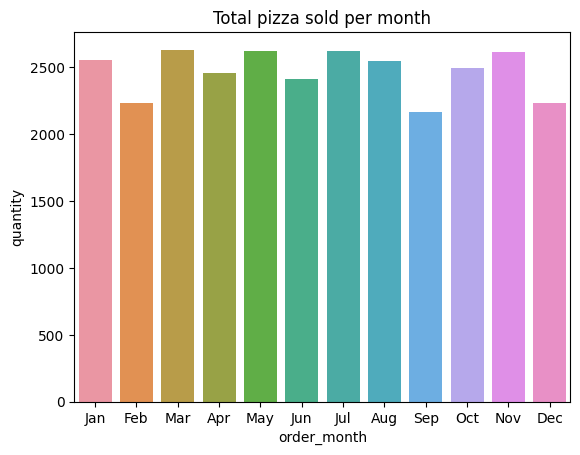

In [93]:
bar = pizza_df_nona.groupby('order_month')['quantity'].sum().sort_values(ascending=False).reset_index()
sns.barplot(data=bar,x='order_month',y='quantity', order = pizza_df_nona.order_month.unique())
plt.title('Total pizza sold per month')

In [94]:
pizza_df_nona.groupby('pizza_size')['total_price'].mean()

pizza_size
S      12.597803
M      16.208175
L      20.266277
XL     25.797376
XXL    35.950000
Name: total_price, dtype: float64

In [95]:
pd.crosstab(index=[pizza_df_nona.order_month],columns=pizza_df_nona.pizza_size,values=pizza_df_nona.total_price,aggfunc='mean')

pizza_size,S,M,L,XL,XXL
order_month,,,,,
Apr,12.631624,16.236264,20.144984,25.500000,35.95
Aug,12.681450,16.179454,20.291505,25.500000,35.95
Dec,12.659302,16.241983,20.345299,25.500000,NaN
Feb,12.583552,16.125000,20.285406,25.500000,35.95
Jan,12.433357,16.314241,20.238107,25.500000,NaN
Jul,12.631349,16.235311,20.347946,26.322581,35.95
Jun,12.482974,16.162171,20.421032,26.137500,35.95
Mar,12.637370,16.276616,20.077218,25.500000,35.95
May,12.620696,16.097960,20.173415,25.500000,35.95


In [96]:
pd.crosstab(index=[pizza_df_nona.order_month,pizza_df_nona.pizza_category],columns=pizza_df_nona.pizza_size,values=pizza_df_nona.total_price,aggfunc='mean')

pizza_size                          S          M          L         XL    XXL
order_month pizza_category                                                   
Apr         Chicken         12.750000  17.023098  21.328685        NaN    NaN
            Classic         11.740864  15.012162  18.496114  25.500000  35.95
            Supreme         14.674490  16.855469  20.932955        NaN    NaN
            Veggie          12.320690  16.013473  19.625427        NaN    NaN
Aug         Chicken         12.750000  17.266975  21.509146        NaN    NaN
            Classic         11.801223  14.972222  18.564677  25.500000  35.95
            Supreme         14.623270  16.894231  21.071000        NaN    NaN
            Veggie          12.453629  15.829235  19.765357        NaN    NaN
Dec         Chicken         12.750000  16.945906  21.679104        NaN    NaN
            Classic         11.894265  15.062500  18.711230  25.500000    NaN
            Supreme         14.113176  16.834337  21.185185        NaN    NaN
            Veggie          12.559735  16.231818  19.844215        NaN    NaN
Feb         Chicken         12.750000  16.850299  20.968421        NaN    NaN
            Classic         11.617857  15.052023  18.644068  25.500000  35.95
            Supreme         14.210112  16.518895  21.059045        NaN    NaN
            Veggie          12.284553  16.104688  20.313008        NaN    NaN
Jan         Chicken         12.997573  17.444301  21.238235        NaN    NaN
            Classic         11.583051  15.126250  18.348592  25.500000    NaN
            Supreme         13.709091  16.673810  21.185897        NaN    NaN
            Veggie          12.174797  16.014706  19.978147        NaN    NaN
Jul         Chicken         12.979730  17.117325  21.161706        NaN    NaN
            Classic         11.675806  15.106164  18.721053  26.322581  35.95
            Supreme         14.495882  16.592857  21.140487        NaN    NaN
            Veggie          12.271212  16.086340  20.055837        NaN    NaN
Jun         Chicken         12.880102  17.102632  21.618201        NaN    NaN
            Classic         11.514912  14.844498  18.952381  26.137500  35.95
            Supreme         14.381690  16.742683  21.127174        NaN    NaN
            Veggie          12.219758  16.046632  19.657813        NaN    NaN
Mar         Chicken         12.954000  17.010363  21.518519        NaN    NaN
            Classic         11.566667  14.855505  18.353211  25.500000  35.95
            Supreme         14.584973  17.019430  20.816946        NaN    NaN
            Veggie          12.243289  16.410811  19.388406        NaN    NaN
May         Chicken         13.063525  16.750000  20.831693        NaN    NaN
            Classic         11.717949  14.694853  18.814951  25.500000  35.95
            Supreme         14.148870  16.834524  21.028509        NaN    NaN
            Veggie          12.335000  16.034091  19.882192        NaN    NaN
Nov         Chicken         12.750000  17.190789  21.342857        NaN    NaN
            Classic         11.695338  14.900452  18.507177  25.500000    NaN
            Supreme         14.517197  16.645299  21.255187        NaN    NaN
            Veggie          12.422932  16.136111  19.827541        NaN    NaN
Oct         Chicken         12.750000  17.164604  21.652174        NaN    NaN
            Classic         11.697080  14.869403  18.475352  26.296875  35.95
            Supreme         14.126807  16.796380  21.084402        NaN    NaN
            Veggie          12.248120  16.218927  19.973922        NaN    NaN
Sep         Chicken         12.750000  17.020161  21.152913        NaN    NaN
            Classic         11.684363  14.858280  19.300287  26.520000  35.95
            Supreme         14.569643  16.532857  21.146919        NaN    NaN
            Veggie          12.218182  15.947368  19.668016        NaN    NaN

In [97]:
pizza_df_nona.pizza_ingredients.value_counts()

pizza_ingredients
Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce                  1465
Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon                                                 1414
Mozzarella Cheese, Pepperoni                                                                         1412
Sliced Ham, Pineapple, Mozzarella Cheese                                                             1379
Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce                                   1353
Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese                  1351
Capocollo, Tomatoes, Goat Cheese, Artichokes, Peperoncini verdi, Garlic                              1145
Ricotta Cheese, Gorgonzola Piccante Cheese, Mozzarella Cheese, Parmigiano Reggiano Cheese, Garlic    1111
Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic                              1111
Coarse Sicilian Salami, Toma

In [98]:
pizza_df_nona.pizza_name.value_counts()

pizza_name
The Barbecue Chicken Pizza                    1465
The Classic Deluxe Pizza                      1414
The Pepperoni Pizza                           1412
The Hawaiian Pizza                            1379
The Thai Chicken Pizza                        1353
The California Chicken Pizza                  1351
The Spicy Italian Pizza                       1145
The Four Cheese Pizza                         1111
The Italian Supreme Pizza                     1111
The Sicilian Pizza                            1103
The Southwest Chicken Pizza                   1102
The Big Meat Pizza                            1082
The Vegetables + Vegetables Pizza              927
The Spinach and Feta Pizza                     869
The Italian Capocollo Pizza                    866
The Mexicana Pizza                             860
The Napolitana Pizza                           857
The Pepper Salami Pizza                        848
The Five Cheese Pizza                          848
The Greek Pizza     

In [99]:
pizza_df_nona.groupby(['order_month'])['pizza_name'].apply(lambda a: a.value_counts(ascending=False).index[0])

order_month
Apr              The Hawaiian Pizza
Aug             The Pepperoni Pizza
Dec        The Classic Deluxe Pizza
Feb             The Pepperoni Pizza
Jan             The Pepperoni Pizza
Jul      The Barbecue Chicken Pizza
Jun              The Hawaiian Pizza
Mar    The California Chicken Pizza
May      The Barbecue Chicken Pizza
Nov        The Classic Deluxe Pizza
Oct    The California Chicken Pizza
Sep      The Barbecue Chicken Pizza
Name: pizza_name, dtype: object

In [100]:
monthly_pop_pizza = pizza_df_nona.groupby(['order_month'])['pizza_name'].apply(lambda a: a.value_counts(ascending=False).index[0]).reset_index()
monthly_pop_pizza.pizza_name.value_counts()
#The most popular pizzas each month

pizza_name
The Pepperoni Pizza             3
The Barbecue Chicken Pizza      3
The Hawaiian Pizza              2
The Classic Deluxe Pizza        2
The California Chicken Pizza    2
Name: count, dtype: int64

Pepperoni and 'Barbeque Chicken' are the most popular pizzas; most indemand for the year 2015; each of them is the most popular in 3 months different each.

In [101]:
pizza_df_nona.groupby(['order_month','pizza_name'])['pizza_name'].count().head(15)

order_month  pizza_name                  
Apr          The Barbecue Chicken Pizza      123
             The Big Meat Pizza               94
             The Brie Carre Pizza             25
             The Calabrese Pizza              42
             The California Chicken Pizza    109
             The Chicken Alfredo Pizza        53
             The Chicken Pesto Pizza          44
             The Classic Deluxe Pizza        108
             The Five Cheese Pizza            74
             The Four Cheese Pizza           107
             The Greek Pizza                  49
             The Green Garden Pizza           59
             The Hawaiian Pizza              132
             The Italian Capocollo Pizza      70
             The Italian Supreme Pizza        74
Name: pizza_name, dtype: int64

In [102]:
pizza_df_nona['Chicken'] = pizza_df_nona.pizza_ingredients.str.count('Chicken')

/tmp/ipykernel_42/2931757334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pizza_df_nona['Chicken'] = pizza_df_nona.pizza_ingredients.str.count('Chicken')


In [105]:
pizza_df_nona['Chicken'].sum()

6416

In [106]:
pizza_df_nona['Chicken_tf'] = pizza_df_nona['pizza_ingredients'].apply(lambda a: True if 'Chicken'in a else False)

/tmp/ipykernel_42/1324853516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pizza_df_nona['Chicken_tf'] = pizza_df_nona['pizza_ingredients'].apply(lambda a: True if 'Chicken'in a else False)


In [107]:
pizza_df_nona['Chicken_tf'].sum()

6416

In [108]:
(pizza_df_nona['Chicken_tf'].sum()/pizza_df_nona.shape[0])*100

22.098990803568352

22% percent of the pizzas ordered in 2015 have chicken in their ingredients.

In [109]:
pizza_df_nona.groupby('Chicken_tf')['total_price'].mean()

Chicken_tf
False    16.486221
True     18.107933
Name: total_price, dtype: float64

Text(0.5, 1.0, 'Distribution of Total Price of pizzas without Chicken')

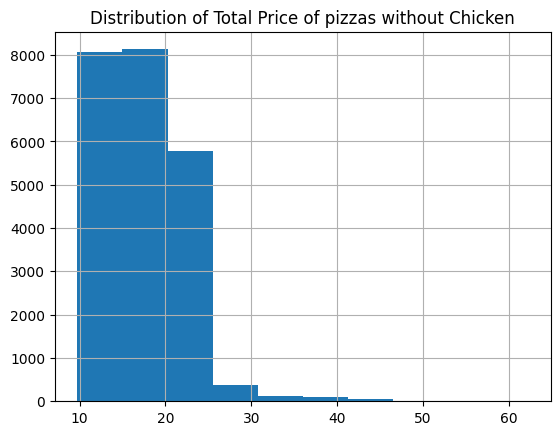

In [112]:
pizza_df_nona.loc[pizza_df_nona.Chicken_tf==False].total_price.hist()
plt.title('Distribution of Total Price of pizzas without Chicken')

Text(0.5, 1.0, 'Distribution of Total Price of pizzas with Chicken')

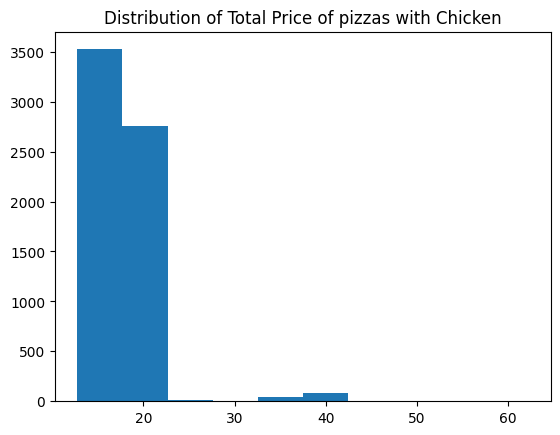

In [114]:
pizza_df_nona.loc[pizza_df_nona.Chicken_tf==True].total_price.hist(grid=False)
plt.title('Distribution of Total Price of pizzas with Chicken')

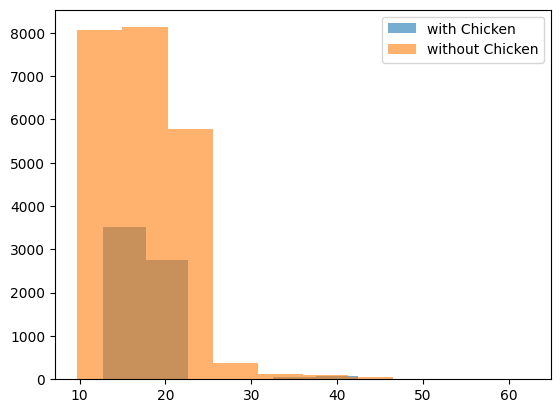

In [115]:
pizza_df_nona.loc[pizza_df_nona.Chicken_tf==True].total_price.hist(grid=False, alpha=.6, label='with Chicken')
pizza_df_nona.loc[pizza_df_nona.Chicken_tf==False].total_price.hist(grid=False, alpha=.6, label='without Chicken')
plt.legend()


There isn't any disernable difference between pizzas with chicken and those without.

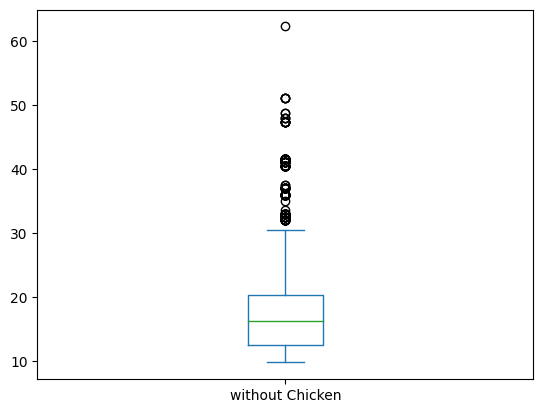

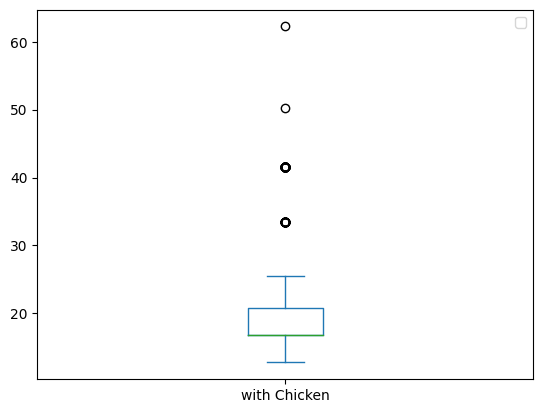

In [123]:
pizza_df_nona.loc[pizza_df_nona.Chicken_tf==False].total_price.plot.box(label='without Chicken')
plt.show()
pizza_df_nona.loc[pizza_df_nona.Chicken_tf==True].total_price.plot.box(label='with Chicken')
plt.legend()

Text(0.5, 0, 'Chicken')

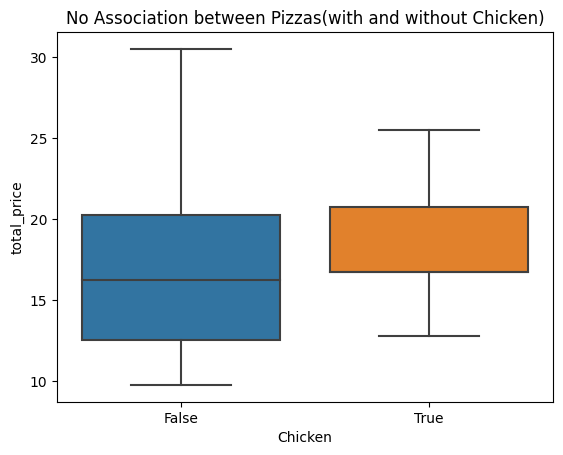

In [131]:
sns.boxplot(x=pizza_df_nona.Chicken_tf,y=pizza_df_nona.total_price, showfliers=False)
plt.title('No Association between Pizzas(with and without Chicken)')
plt.xlabel('Chicken')

The box plot confirms that there is no association between the different pizzas(with and without chicken); this is because there is a lot of overlap between the two box-plots.

No association means that having chicken in the pizza doesnt necessarily influence the price.